## Breast Cancer Classification with a simple neural network

#### Import data analysis dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import the data spliting module

In [ ]:
from sklearn.model_selection import train_test_split

#### Import deep learning dependencies

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

#### Import a data scaling technique

In [ ]:
from sklearn.preprocessing import StandardaScaler

#### Set pandas to display columns at maximum

In [ ]:
pd.set_option('display.max_columns', None)

#### Loading the dataset

In [ ]:
breast_cancer_data =pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\DEEP LEARNING\Breast Cancer Classification with Neural Network\breast_cancer_data.csv')

#### Display the first 5 rows

In [ ]:
breast_cancer_data.head(5)

#### Get the shape of the dataset

In [ ]:
breast_cancer_data.shape

#### Display the basic statistics of the dataset

In [ ]:
breast_cancer_data.describe()

#### Check whether there are null values in the dataset

In [ ]:
breast_cancer_data.isnull().sum()

#### Display the distribution of the target variable

In [ ]:
breast_cancer_data['HAS_CANCER'].value_counts()

####  0 -> Malignant
####  1 -> Benign

#### Display the basic statictics of the target variable

In [ ]:
breast_cancer_data.groupby('HAS_CANCER').mean().T

#### We have already selected important features in the dataframe in a previous project

In [ ]:
selected_breast_cancer_data =pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\DEEP LEARNING\Breast Cancer Classification with Neural Network\breast_cancer_selected_data.csv')

In [ ]:
selected_breast_cancer_data

#### Split the data into independent and target variables

In [ ]:
X = selected_breast_cancer_data.drop(columns = ['HAS_CANCER'] , axis = 1)
Y = selected_breast_cancer_data['HAS_CANCER'] # Target Variable

In [ ]:
X

In [ ]:
Y

#### Split the dataset into training and testing chunks

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5, stratify = Y)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#### We need to standardize the data before feeding it to the neural network

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

### Building a neural network

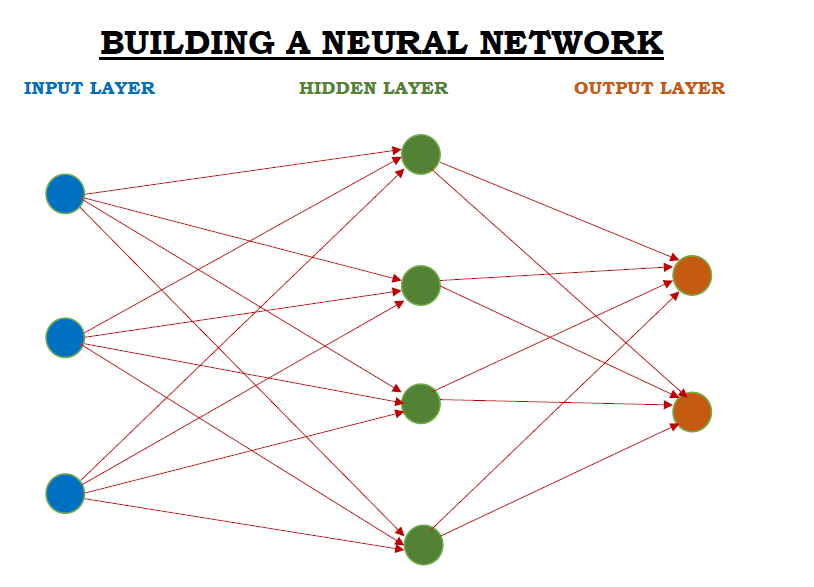

#### Setting up the layers of the neural network

##### Here, we will set up the following:
##### 1. An input layer with 16 neurons
##### 2. 7 hidden layers with different number of neurons
##### 3. An output layer with 2 neurons

####  The hidden layers will use the ReLU activation function
####  The output layer will use the sigmoid activation function

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(25,activation ='relu'),
    keras.layers.Dense(20, activation ='relu')
    keras.layers.Dense(18, activation ='relu')
    keras.layers.Dense(15, activation ='relu')
    keras.layers.Dense(12, activation ='relu')
    keras.layers.Dense(10, activation ='relu')
    keras.layers.Dense(5, activation ='relu')
    keras.layers.Dense(2, activation ='sigmoid')
])30

#### Compiling the neural network

In [ ]:
model.compile (
    
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

#### Training the neural network

In [ ]:
history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 20)

#### Visualizing the Accuracy along the epochs

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')

In [ ]:
#### Visualizing the Loss along the epochs

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Validation data'], loc = 'upper right')

In [ ]:
loss , accuracy = model.evaluate(X_test_std, Y_test)

print(accuracy)

In [ ]:
Y_pred = model.predict(X_test_std)

In [ ]:
print(Y_pred.shape)

In [ ]:
print(Y_pred[0])

#### Model.predict() gives  the prediction probability of each class for that datapoint

#### Converting the prediction probability into class labels

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [ ]:
print(Y_pred_labels)

### Build a predictive system for the neural network

In [ ]:
unseen_input_data = [
    
    [9.423,59.26,271.3,0.04971,0,0,0.5375,3.618,29.11,10.49,34.24,66.5,330.6,0.07158,0,0],
    [14.59,96.39,657.1,0.133,0.1029,0.03736,0.2254,2.224,19.54,15.48,27.27,105.9,733.5,0.3171,0.3662,0.1105],
    [11.51,74.52,403.5,0.1021,0.1112,0.04105,0.2388,1.936,16.97,12.48,37.16,82.28,474.2,0.2517,0.363,0.09653],
    [14.05,91.38,600.4,0.1126,0.04462,0.04304,0.3645,2.888,29.84,15.3,33.17,100.2,706.7,0.2264,0.1326,0.1048],
    [11.2,70.67,386,0.03558,0,0,0.3141,2.041,22.81,11.92,38.3,75.19,439.6,0.05494,0,0],
    [15.22,103.4,716.9,0.2087,0.255,0.09429,0.2602,2.362,22.65,17.52,42.79,128.7,915,0.7917,1.17,0.2356],
    [20.92,143,1347,0.2236,0.3174,0.1474,0.9622,8.758,118.8,24.29,29.41,179.1,1819,0.4186,0.6599,0.2542],
    [21.56,142,1479,0.1159,0.2439,0.1389,1.176,7.673,158.7,25.45,26.4,166.1,2027,0.2113,0.4107,0.2216],
    [20.13,131.2,1261,0.1034,0.144,0.09791,0.7655,5.203,99.04,23.69,38.25,155,1731,0.1922,0.3215,0.1628],
    [16.6,108.3,858.1,0.1023,0.09251,0.05302,0.4564,3.425,48.55,18.98,34.12,126.7,1124,0.3094,0.3403,0.1418],
    [20.6,140.1,1265,0.277,0.3514,0.152,0.726,5.772,86.22,25.74,39.42,184.6,1821,0.8681,0.9387,0.265],
    [7.76,47.92,181,0.04362,0,0,0.3857,2.548,19.15,9.456,30.37,59.16,268.6,0.06444,0,0]
    
]

In [ ]:
def test_model():
    for data in unseen_input_data:
        # change the data into a numpy array
        input_data_as_numpy_array = np.asarray(data)
        # reshape the numpy array
        reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)
        # Standardize reshaped data
        standardized_data = scaler.transform(reshaped_input_data)
        # Predict new values
        prediction  = model.predict(standardized_data)
        
        print(prediction)
        
        prediction_label = [np.argmax(prediction)]
        
        print(prediction_label)
        
        if prediction_label[0]==0:
            print('The tumour is malignant')
        else:
            print('The tumor is benign')

In [ ]:
test_model()

# The model is 100% Accurate
#### 1 correct
#### 1 correct
#### 1 correct
#### 1 correct
#### 1 correct
#### 0 correct
#### 0 correct
#### 0 correct
#### 0 correct
#### 0 correct
#### 0 correct
#### 1 correct